#### Z -test is a statistical test to compare sample mean to a known population mean or compare two sample means. 
1. Z test is based on z distribution which is standard normal distribution.
2. Z distribution assumes 0 mean and 1 standard deviation under null hypothese.
3. If population std. devaition is known then sample size can be small < 30
4. If population std. devaition is not known then sample size should be > 30 to perform Z test as per central limit theorm.
5. Samples should be randomly choosen and independent.
6. We can use z test to compare two samples also but for that we should know std. devaition of both populations.
7. If we don't know population std. devaition and also sample size is small, we have to go for t-test inplace of z-test.

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("vjchoudhary7/customer-segmentation-tutorial-in-python")

# print("Path to dataset files:", path)

In [15]:
import pandas as pd
pd.set_option('display.max_columns', None)

pd.set_option('display.max_rows', None)

pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
import numpy as np

In [8]:
data = pd.read_csv(r'data\Mall_Customers.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [9]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#### lets say we want to test if average spending score differ from population or not
#### we don't have population standarad devaittion, so we should go for t- test but fo rlearning we will take sample standard deviation
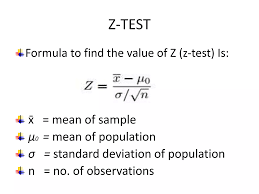

In [22]:
from scipy.stats import norm

# lets assume popualtion mean is 50 
# Ho : sample mean is == 50
# H1 : sample mean is != 50
# Population std ≈ Sample std
# two tailed test

pop_mean = 50

sample = data['Spending Score (1-100)']
sample_mean = sample.mean()
sample_std = sample.std()
n = len(sample)

# z statistics
z_score = (sample_mean - pop_mean)/(sample_std/np.sqrt(n))
print(f"Z statistics : {z_score : .3f}")

# two tailed p- value
p_value = 2 * (1 - norm.cdf(abs(z_score)))
print(f"p-value is : {p_value : .3f}")

if p_value < 0.05:  # 0.05 is significance levek which means i am accepting risk of 5% type 1 error if my null hypothese is true.
    print("We reject the null hypothesis: Sample mean is significantly different from population mean.")
else:
    print("We fail to reject the null hypothesis: No significant difference from population mean.")


Z statistics :  0.110
p-value is :  0.913
We fail to reject the null hypothesis: No significant difference from population mean.


#### ✅ What Do These Values Mean?
🧮 Z-statistic = 0.11
This means that the sample mean is just 0.11 standard errors away from the population mean (which we've assumed to be 50).

In simpler terms:
The observed sample mean is very close to what we’d expect if the true mean were 50.

**📐 What is Standard Error?**
The Standard Error (SE) is the standard deviation of the sampling distribution of the sample mean.

If you:

Take many random samples of the same size from a population,

Calculate the mean of each,

Plot all those sample means...

👉 The spread (standard deviation) of that distribution is called the Standard Error.

Formula:
Standard Error = Sample Standard Deviation / sqrt(sample size)
 
🔁 Putting It All Together:
So when your z-statistic is 0.11, it means:

“The sample mean is only 0.11 SE units away from the population mean.”

Since this is such a small distance, it's well within the range of random variation you'd expect if the null hypothesis were true — hence, you fail to reject it.

**P value** : it says there is 90% chance of observing my sample mean to be this far or more from true popualtion mean just by random chance.
In this case, we are saying if my null hypothsis is true, there is 90% probability of observing sample mean to be so close to population mean just by sampling variation, so we can't reject null hypothesis.

**What “Random Chance” Actually Means**

It refers to Natural sampling variability due to taking only a sample instead of the whole population.The noise you expect in real-world data collection.

So when we say:

"There's a 90% chance I could see a result this extreme just by random chance,"

We mean:

"Given that nothing special is going on (null is true), it’s very likely that random variation alone could explain the result I got."


#### Final Revised Summary
When I conduct a hypothesis test, I’m essentially checking whether there is a real, statistically significant difference between groups — in other words, is the observed difference due to something meaningful, or could it just be due to random chance?
The null hypothesis (H₀) assumes that there is no real difference, while the alternate hypothesis (H₁) assumes that a true difference exists.

The p-value is the probability of observing a test statistic as extreme as mine — or more extreme — purely by random chance, assuming the null hypothesis is true. It does not tell me whether the null is true or false. Instead, it asks: "If the null hypothesis were true, how unusual would my observed result be?"

For example, a p-value of 0.03 means there’s a 3% chance I’d see a result this extreme just by random variation, assuming H₀ is correct. If this probability is low enough — typically below a significance level (α) of 0.05 — I reject the null, accepting that the result is likely not due to chance. Becasue when p value is less, you will find test result value fall right or left to the critical value, or I can say at the tail of distribution, so this much distance can't happen purely due to chance, so we can say there is a statistical difference.p-value of 0.03 means there’s a 3% chance of observing a test statistic this extreme — or even more extreme — purely by random variation, assuming the null hypothesis (H₀) is true.
Now, if this probability is less than the chosen significance level (α = 0.05), we say the result is statistically significant and we reject H₀.

Why?
Because low p-values correspond to results that fall far out in the tails of the sampling distribution — that is, they lie far from the expected value under H₀. This much deviation is unlikely to occur just by chance, which makes us question the assumption that H₀ is true.

In simpler terms:
When a test result is so far from the null expectation that it lands in the tail of the distribution, we doubt it happened by chance — and thus, we reject the null hypothesis, concluding there’s likely a real difference.

This threshold, α (significance level), represents the maximum risk I’m willing to take for making a Type I error — i.e., rejecting a true null hypothesis. So, when p-value < α, I say the result is statistically significant and I reject H₀, knowing there's still a small (e.g., 5%) chance that I could be wrong.

In summary:
Statistical significance means the result is likely not due to random noise.
P-value quantifies how surprising my data is, assuming H₀ is true.
Significance level (α) is the risk I’m okay with for wrongly rejecting H₀.
If p-value < α → I reject H₀ (strong evidence against H₀).
If p-value ≥ α → I fail to reject H₀ (not enough evidence against it).



#### When to Use Two-Sample Z-Test?
1. When we want to compare mean of two samples taken from a population.
2. Sample size is > 30
3. Population variance is known or we are approximating here for learning
4. Samples are independent as male and female in this dataset
5. The variable of interest is continuous (e.g., Spending Score).

#### Hypotheses:
1. Null Hypothesis: There is no statistical significant difference between average spending score of male and female
2. Alernate Hypothesis: There is a statistical significant differenc between average spending score of male and female.

In [25]:
group1 = data[data['Gender'] == 'Male']['Spending Score (1-100)']
group2 = data[data['Gender'] == 'Female'] ['Spending Score (1-100)']
mean1, mean2 = group1.mean(), group2.mean()
std1, std2 = group1.std(), group2.std()
n1, n2 = len(group1), len(group2)

# z statistic
z = (mean1 - mean2) / np.sqrt((std1**2 / n1) + (std2**2 / n2))

# two-tailed p-value
p_val = 2 * (1 - norm.cdf(abs(z)))
print(f"z stats : {z:.2f}")
print(f"p value : {p_val: .4f}")

z stats : -0.80
p value :  0.4209


In [27]:
if p_val < 0.05:
    print("We reject null hypothesis: There is a statistical significant differenc between average spending score of male and female.")
else:
    print("we fail to reject null hypothesis: There is no statistical significant differenc between average spending score of male and female.")

we fail to reject null hypothesis: There is no statistical significant differenc between average spending score of male and female.


### ✅ Final Interpretation
Z-statistic = –0.80
This tells you that the difference between male and female average spending scores is only 0.80 standard errors away from 0. That’s a small difference.

P-value = 0.421
This means:
👉 If the true population means are equal (i.e., H₀ is true), there is a 42.1% chance you’d observe a difference in sample means this big (or bigger) just by random chance.

**Conclusion:**
Because p = 0.421 > α = 0.05:

❌ We fail to reject the null hypothesis.
✅ There is no statistically significant difference in average spending score between male and female customers.